In [415]:
#1. PREPARACION DEL ENTORNO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [416]:
#2. CARAGAR EL CONJUNTO DE DATOS

#URL del dataset en GITHUB 
url = 'https://github.com/Ajaimem21/ajaime/raw/refs/heads/main/CO2%20emission%20by%20countries.csv'

#Cargar el dataset desde la URL
df = pd.read_csv(url, encoding='unicode_escape')

#Crear una copia del dataset original para modificar
df_modificado = df.copy()

#Imprimir las primeras 5 lineas del dataset
print(df_modificado.head())

       Country Code Calling Code  Year  CO2 emission (Tons)  Population(2022)  \
0  Afghanistan   AF           93  1750                  0.0        41128771.0   
1  Afghanistan   AF           93  1751                  0.0        41128771.0   
2  Afghanistan   AF           93  1752                  0.0        41128771.0   
3  Afghanistan   AF           93  1753                  0.0        41128771.0   
4  Afghanistan   AF           93  1754                  0.0        41128771.0   

       Area % of World Density(km2)  
0  652230.0      0.40%       63/km²  
1  652230.0      0.40%       63/km²  
2  652230.0      0.40%       63/km²  
3  652230.0      0.40%       63/km²  
4  652230.0      0.40%       63/km²  


In [417]:
#3. EXPLORACION INICIAL

#Mostrar número de filas y columnas
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Ver el tipo de dato de cada columna
print("")
print(df_modificado.dtypes)

# Ver descripción de las variables numéricas
print("")
print(df_modificado.describe())

# Ver descripción de las variables categóricas
print("")
print(df_modificado.describe(include=['object']))

Filas: 59620, Columnas: 9

Country                 object
Code                    object
Calling Code            object
Year                     int64
CO2 emission (Tons)    float64
Population(2022)       float64
Area                   float64
% of World              object
Density(km2)            object
dtype: object

               Year  CO2 emission (Tons)  Population(2022)          Area
count  59620.000000         5.962000e+04      5.311600e+04  5.528400e+04
mean    1885.000000         1.034774e+09      3.992260e+07  6.522073e+05
std       78.231085         1.041652e+10      1.482365e+08  1.865483e+06
min     1750.000000         0.000000e+00      1.131200e+04  2.100000e+01
25%     1817.000000         0.000000e+00      1.770414e+06  1.770450e+04
50%     1885.000000         0.000000e+00      8.673095e+06  1.103815e+05
75%     1953.000000         8.715092e+06      2.862920e+07  4.925730e+05
max     2020.000000         4.170000e+11      1.425887e+09  1.709824e+07

            Country  

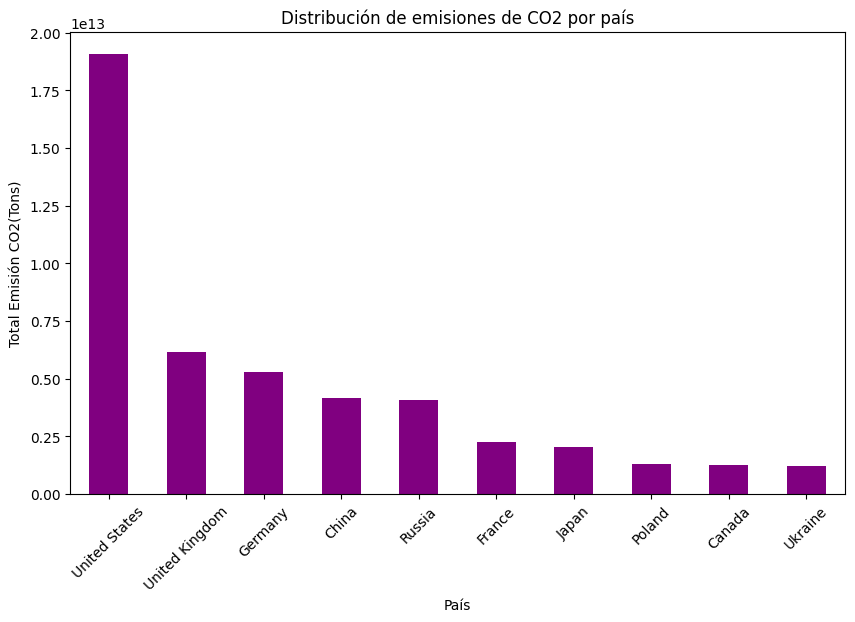

In [418]:
#4. VISUALIZACION DE DATOS

#Gráfico de Barras para la Distribución de emisiones de CO2 por País(los 10 paises con mas emisión)
top_10_countries = df_modificado.groupby('Country')['CO2 emission (Tons)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='purple')
plt.title('Distribución de emisiones de CO2 por país')
plt.xlabel('País')
plt.ylabel('Total Emisión CO2(Tons)')
plt.xticks(rotation=45)
plt.show()

C:\Users\ajaim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


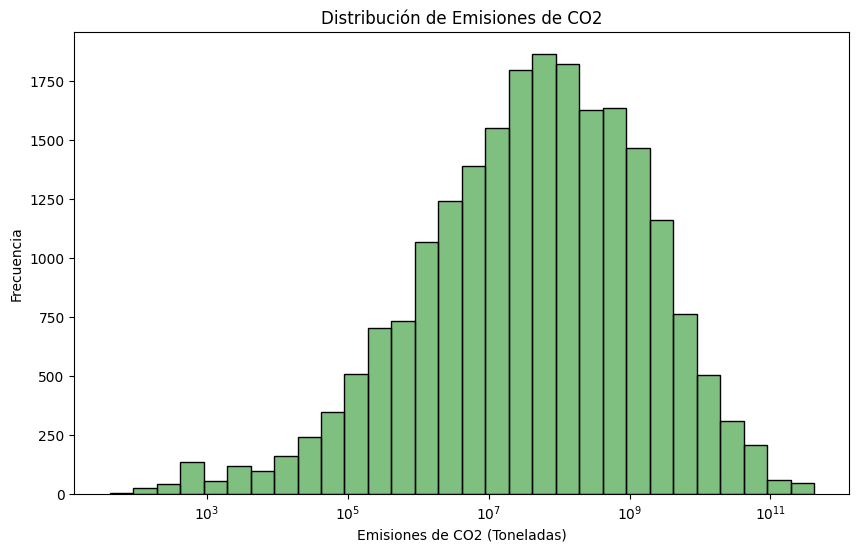

In [419]:
#Histograma de emisiones de CO2
plt.figure(figsize=(10, 6))
sns.histplot(df_modificado['CO2 emission (Tons)'], bins=30, kde=True,  color='green', log_scale=True)
plt.title('Distribución de Emisiones de CO2')
plt.xlabel('Emisiones de CO2 (Toneladas)')
plt.ylabel('Frecuencia')
plt.show()

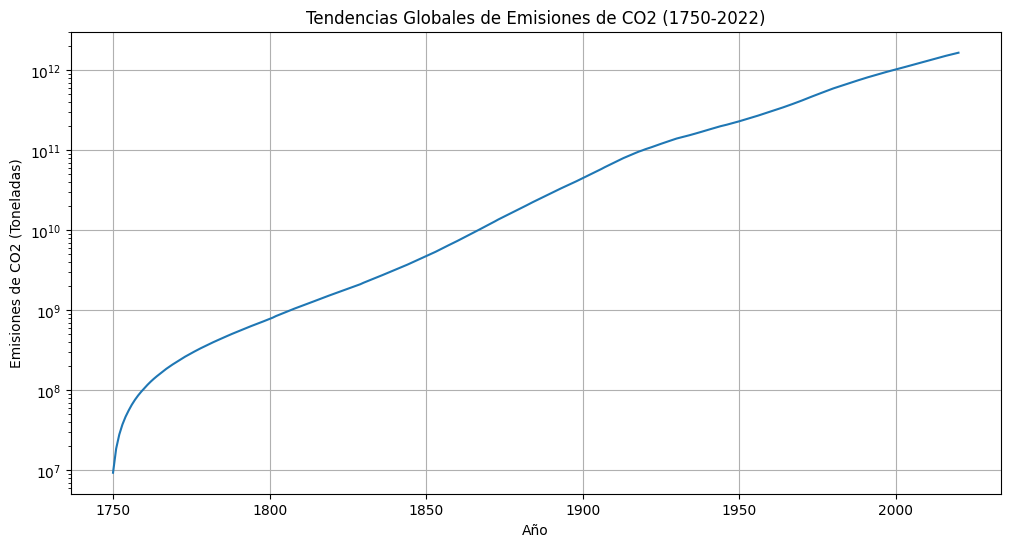

In [420]:
#5. ANALISIS DE TENDENCIAS TEMPORALES

#Agrupar datos por año y sumar las emisiones globales
df_global = df_modificado.groupby('Year')['CO2 emission (Tons)'].sum().reset_index()

# Gráfico de líneas para ver las tendencias globales de emisiones de CO2
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 emission (Tons)', data=df_global)
plt.title('Tendencias Globales de Emisiones de CO2 (1750-2022)')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (Toneladas)')
plt.yscale('log')
plt.grid(True)
plt.show()

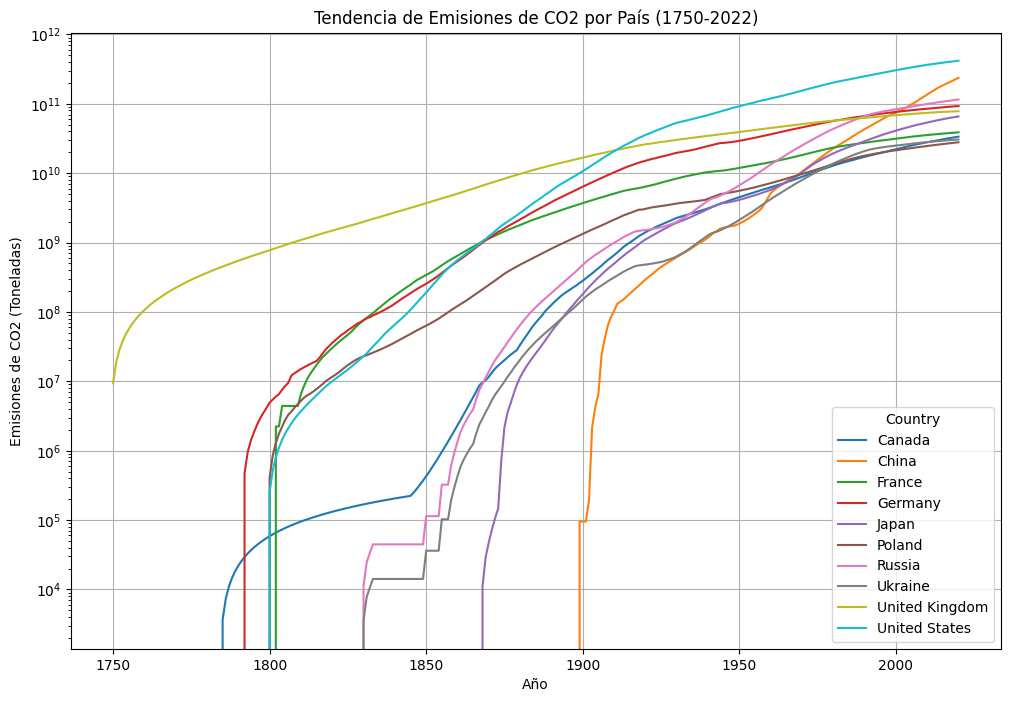

In [421]:
#Gráfico de líneas por país a lo largo del tiempo
top_10_countries= df_modificado.groupby('Country')['CO2 emission (Tons)'].sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_modificado[df_modificado['Country'].isin(top_10_countries)], x='Year', y='CO2 emission (Tons)', hue='Country')
plt.title('Tendencia de Emisiones de CO2 por País (1750-2022)')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (Toneladas)')
plt.yscale('log')
plt.grid(True)
plt.show()

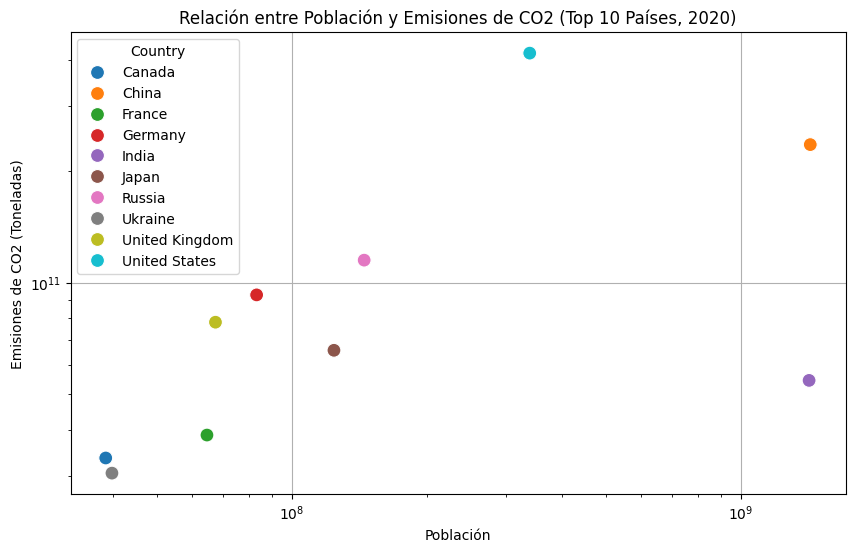

In [422]:
#6. IDENTIFICACION DE PATRONES

# Gráfico de dispersión de emisiones vs población para el año 2020
# Filtrar los datos para el año 2022
df_2020 = df_modificado[df_modificado['Year'] == 2020]

# Seleccionar los 10 países con mayores emisiones de CO2 en 2020
top_10_countries_2020 = df_2020.groupby('Country')['CO2 emission (Tons)'].sum().sort_values(ascending=False).head(10).index
df_top_10_2020 = df_2020[df_2020['Country'].isin(top_10_countries_2020)]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_10_2020, x='Population(2022)', y='CO2 emission (Tons)', hue='Country', s=100)
plt.title('Relación entre Población y Emisiones de CO2 (Top 10 Países, 2020)')
plt.xlabel('Población')
plt.ylabel('Emisiones de CO2 (Toneladas)')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

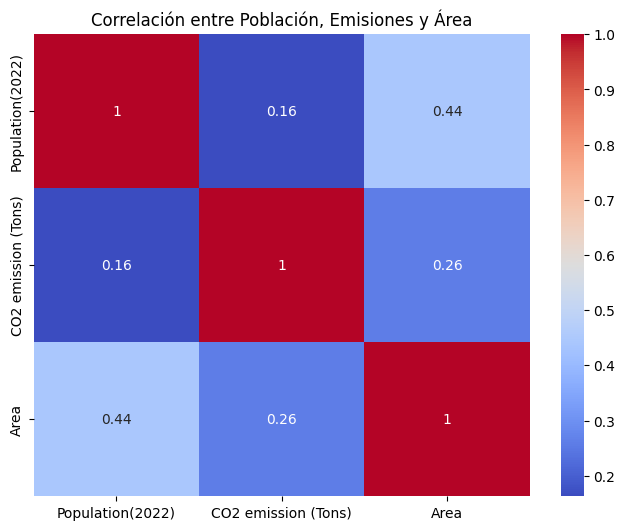

In [423]:
#Mapa de calor para ver la correlación entre las variables numéricas

#Seleccionar columnas numéricas
variables_numericas = df_modificado[['Population(2022)', 'CO2 emission (Tons)', 'Area']]

# Calcular la matriz de correlación
correlacion = variables_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Correlación entre Población, Emisiones y Área')
plt.show()